# Sprint 1: Data analysis and supervised learning

## Opmerkingen dataset

* Complaint volume moet in verband worden gebracht met de grootte en het marktaandeel van het bedrijf.
Een bedrijf met een groot aantal klanten zal bijvoorbeeld meer klachten hebben dan één met een klein aantal klanten.

## Inlezen dataset

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re, string
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.preprocessing import LabelEncoder

punc = list(set(string.punctuation))
add_stop = ['', ' ', 'say', 's', 'u', 'ap', 'afp', '...', 'n', '\\']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

def clean_string(string):
    string =string.lower()
    string = re.sub(r'[^\w\s]','',string)
    string = re.sub(r'[0-9]|,','',string)
    string = string.replace('\r',' ')
    string = string.replace('\n',' ')
    string = string.replace('x','')
    string = re.sub(r'( )+',' ',string)
    words = string.split(' ')
    no_stop = [w for w in words if w not in stop_words]
    return " ".join(no_stop)

def read_all_complaints() :
    # Store all the data of the complaints in an array of maps. (amount of maps = amount of complaints)
    all_complaints = []
    with open('data/complaints.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print("All the information stored about a complaint:")
                #for category in row:
                    #print("-" + category)
                line_count += 1
            else: 
                complaint=[]
                full_complaint = " ".join(row[1:5])
                complaint.append(row[1])
                complaint.append(clean_string(row[3]))
                complaint.append(clean_string(row[4]))
                complaint.append(row[5])
                complaint.append(clean_string(row[5]))
                all_complaints.append(complaint)
                line_count += 1
        print(f'File processed of {line_count} lines.')
        return all_complaints
    csv_file.close()
    

complaints = read_all_complaints()
#print(complaints)


#df = pd.DataFrame(complaints, columns = ['Product', 'Sub-product', 'Issue', 'Sub-issue']) 
df = pd.DataFrame(complaints, columns = ['product','issue','sub-issue','narrative','narrative_clean']) 
print("Number of complaints in dataset: ",df.shape[0])
df.replace({'product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 'credit',
              'Credit reporting, repair, or other' : 'credit',
              'Credit reporting' : 'credit',
              'Debt collection': 'dept',
              'Credit card or prepaid card': 'card',
              'Credit card': 'card',
              'Vehicle loan or lease': 'loan',
              'Student loan': 'loan',
              'Bank account or service' : 'account',
              'Consumer Loan' : 'loan',
              'Payday loan' : 'loan',
              'Money transfers' : 'money transfers',
              'Prepaid card' : 'card',
              'Other financial service' : 'other services',
              'Virtual currency' : 'money transfers',
              'Checking or savings account': 'account',
              'Mortgage': 'mortage',
              'Payday loan, title loan, or personal loan': 'loan',
              'Money transfer, virtual currency, or money service': 'money transfers'
             }}, inplace= True)
df




All the information stored about a complaint:
File processed of 485702 lines.
Number of complaints in dataset:  485701


,product,issue,sub-issue,narrative,narrative_clean
0,credit,credit monitoring identity theft protection se...,problem canceling credit monitoring identify t...,I have complained many times that the credit r...,complained times credit reporting eperian inac...
1,dept,false statements representation,attempted collect wrong,please review the current fraud account and al...,review current fraud account fraudulent inquires
2,dept,attempts collect debt owed,debt paid,Called multiple times over the years for a deb...,called multiple times years debt occurred prev...
3,dept,attempts collect debt owed,debt result identity theft,I sent in a letter to the company to have them...,sent letter company validate debt specially as...
4,credit,improper use report,received unsolicited financial product insuran...,On XX/XX/19 I applied for a Debt Relief Produc...,applied debt relief product account eecutive e...
...,...,...,...,...,...
485696,dept,false statements representation,impersonated attorney official,This account was a payday loan from the XXXX X...,account payday loan years complete requesting ...
485697,mortage,loan servicing payments escrow account,,We had a mortgage with XXXX that was discharge...,mortgage discharged chapter bankruptcy years a...
485698,loan,managing loan lease,,I have 2003 XXXX financed through United Auto ...,financed united auto credit payments motor loc...
485699,loan,managing loan lease,,I was on automatic payment for my car loan. In...,automatic payment car loan fine print supposed...


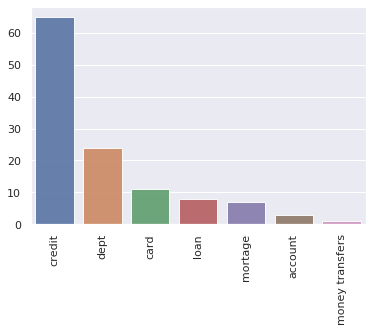

In [12]:
product_count = df['product'].value_counts()
product_count 
sns.set(style="darkgrid")
ax = sns.barplot(product_count.index, product_count.values, alpha=0.9)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [13]:
df_credit = df.loc[df['product'] == 'credit'] 
df_dept = df.loc[df['product'] =='dept']
df_card = df.loc[df['product'] == 'card'] 
df_loan = df.loc[df['product'] =='loan']
df_mortage = df.loc[df['product'] =='mortage']
df_account = df.loc[df['product'] =='account']
df_money_transfers = df.loc[df['product'] =='money transfers']

#Holding out 5 articles from each class for prediction at the end
df_credit_holdout = df_credit.iloc[:5]
df_dept_holdout = df_dept.iloc[:5]
df_card_holdout = df_card.iloc[:5]
df_loan_holdout = df_loan.iloc[:5]
df_mortage_holdout = df_mortage.iloc[:5]
df_account_holdout = df_account.iloc[:5]
df_money_transfers_holdout = df_money_transfers.iloc[:5]


df_credit = df_credit.iloc[5:]
df_dept = df_dept.iloc[5:]
df_card = df_card.iloc[5:]
df_loan = df_loan.iloc[5:]
df_mortage = df_mortage.iloc[5:]
df_account = df_account.iloc[5:]
df_money_transfers = df_money_transfers.iloc[5:]

#Appending the dfs back together
df = pd.concat([df_credit, df_dept, df_card, df_loan, df_mortage, df_account, df_money_transfers ])
df_holdout = pd.concat([df_credit_holdout, df_dept_holdout, df_card_holdout, df_loan_holdout, df_mortage_holdout, df_account_holdout, df_money_transfers_holdout ])

#Turning the labels into numbers
LE = LabelEncoder()
df['product_num'] = LE.fit_transform(df['product'])

display(df.groupby(['product'])['narrative'].count())
display(df_holdout.groupby(['product'])['narrative'].count())
display(df['product'].unique())
display(df['product_num'].unique())

product
card        6
credit     60
dept       19
loan        3
mortage     2
Name: narrative, dtype: int64

product
account            3
card               5
credit             5
dept               5
loan               5
money transfers    1
mortage            5
Name: narrative, dtype: int64

array(['credit', 'dept', 'card', 'loan', 'mortage'], dtype=object)

array([1, 2, 0, 3, 4])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def word_count(df,amount):
    try:
        count_vect = CountVectorizer(analyzer='word',stop_words="english", ngram_range=(amount, amount),min_df=1, max_df=1.0)
        df['narrative_clean']
        X_train_counts = count_vect.fit_transform(df['narrative_clean'])

        feature_names=count_vect.get_feature_names()
        feature_names

        word_count=[]
        for i in range(len(feature_names)):
            word_count.append(0)

        for complaint in X_train_counts.toarray():
            counter = 0
            for word in complaint:
                word_count[counter] += word
                counter += 1

        df_wc =  pd.DataFrame({'name':feature_names, 'count':word_count})
        df_wc = df_wc.sort_values(by=["count"],ascending=False).head(n=15)
        return df_wc.reset_index(drop=True)
    except ValueError:
        print("Empty vocabulary")
        
        

In [15]:
# Top 15 words per category
credit_wc = word_count(df_credit,1)
dept_wc = word_count(df_dept,1)
card_wc = word_count(df_card,1)
loan_wc = word_count(df_loan,1)
morate_wc = word_count(df_mortage,1)
#account_wc = word_freqs(df_account)
#money_transfers_wc = word_freqs(df_money_transfers)

df_wf = pd.concat([credit_wc, dept_wc, card_wc, loan_wc,morate_wc], axis=1)
cols = ['cred', 'count', 'dept', 'count', 'card', 'count', 'loan', 'count', 'mortage', 'count']

df_wf.columns = cols
df_wf

,cred,count,dept,count,card,count,loan,count,mortage,count
0,credit,142,credit,27,card,33,aes,26,account,5
1,reporting,95,account,24,credit,18,borrower,11,money,4
2,account,85,debt,19,told,12,phone,9,check,4
3,report,78,law,19,account,11,sent,7,tiaa,4
4,information,77,letter,19,balance,10,payments,7,contacted,3
5,consumer,54,day,18,called,8,repayment,7,cashed,3
6,eperian,32,firm,16,bank,8,income,7,told,3
7,agency,24,said,15,td,7,sensitivebased,7,access,3
8,file,24,report,15,closed,7,plan,7,ive,3
9,late,23,called,15,payments,7,received,6,im,3


In [16]:
# Top 15 biwords per category
credit_wc = word_count(df_credit,2)
dept_wc = word_count(df_dept,2)
card_wc = word_count(df_card,2)
loan_wc = word_count(df_loan,2)
morate_wc = word_count(df_mortage,2)
#account_wc = word_freqs(df_account)
#money_transfers_wc = word_freqs(df_money_transfers)

df_wf = pd.concat([credit_wc, dept_wc, card_wc, loan_wc,morate_wc], axis=1)
cols = ['cred', 'count', 'dept', 'count', 'card', 'count', 'loan', 'count', 'mortage', 'count']

df_wf.columns = cols
df_wf

,cred,count,dept,count,card,count,loan,count,mortage,count
0,credit report,43,day law,16,credit card,10,income sensitivebased,7,access account,2
1,reporting agency,18,law firm,16,american epress,5,sensitivebased repayment,7,dept working,2
2,consumer reporting,15,credit report,10,td bank,5,repayment plan,7,tiaa bank,2
3,credit reporting,14,credit bureaus,6,line credit,4,follow phone,4,real live,1
4,identity theft,14,national credit,5,card services,4,plan package,4,phone produced,1
5,leington law,10,stall tactics,4,use card,4,did receive,3,photos requested,1
6,information credit,9,received letter,4,pay balance,4,aes engaged,3,possibly illegal,1
7,fair credit,8,credit systems,4,credit history,3,phone aes,3,problem tiaa,1
8,late payments,8,eplained situation,3,account representative,3,aes agents,3,produced real,1
9,social security,8,information credit,3,received statement,2,prestige auto,2,proper documentation,1


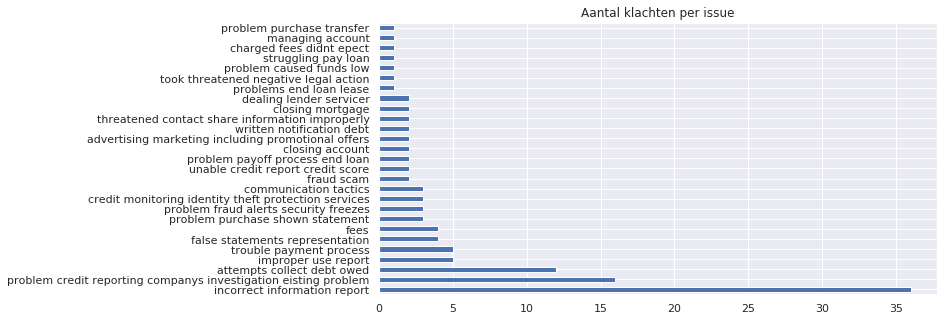

In [29]:
product_count = df['issue'].value_counts()
fig = plt.figure(figsize=(10, 5))
product_count.plot.barh(title="Aantal klachten per issue", legend=None)

In [33]:
sub_product_counts = pd.DataFrame({'Count': df.groupby(['issue', 'sub-issue']).size()})
sub_product_counts

Count
issue                                              sub-issue                                                
advertising marketing including promotional offers confusing misleading advertising credit card            1
                                                   didnt receive advertised promotional terms              1
attempts collect debt owed                         debt                                                    3
                                                   debt discharged bankruptcy longer owed                  1
                                                   debt paid                                               3
                                                   debt result identity theft                              5
charged fees didnt epect                                                                                   1
closing account                                    company closed account                                  1
                                                   funds received closed account                           1
closing mortgage                                                                                           2
communication tactics                              frequent repeated calls                                 1
                                                   told stop contacting trying                             2
credit monitoring identity theft protection ser... didnt receive services advertised                       1
                                                   problem canceling credit monitoring identify th...      2
dealing lender servicer                            received bad information loan                           1
                                                   trouble payments handled                                1
false statements representation                    attempted collect wrong                                 2
                                                   impersonated attorney law enforcement governmen...      2
fees                                               charged                                                 1
                                                   problem fees                                            1
                                                   unepected increase rate                                 2
fraud scam                                                                                                 2
improper use report                                credit inquiries report dont recognize                  3
                                                   received unsolicited financial product insuranc...      1
                                                   reporting company used report improperly                1
incorrect information report                       account information incorrect                           8
                                                   account status incorrect                                4
                                                   information belongs                                    19
                                                   information missing report                              2
                                                   old information reappears goes away                     2
                                                   personal information incorrect                          1
managing account                                   problem using debit atm card                            1
problem caused funds low                           overdrafts overdraft fees                               1
problem credit reporting companys investigation... investigation did fi error report                      14
                                                   notified investigation status results                   1
                                                   problem personal st